# Sanofi Paul Ricard
This notebook is being used to generate a nice image of cars around the Paul Ricard ciruit.

It reads in the leaderboard.csv produced by QlikSense Race Dashboard.ipynb



In [1]:
# import libraries
import plotly.graph_objects as go
import pandas as pd
import fastf1 as ff1
import numpy as np
import set_config

In [2]:
dir_local = set_config.ConfigSectionMap("SectionOne")['local']
dir_sanofi_share = set_config.ConfigSectionMap("SectionOne")['sanofi']
dir_race = set_config.ConfigSectionMap("SectionOne")['race']

print ("dir_sanofi_share is %s" % (dir_sanofi_share))
print ("dir_local is %s" % (dir_local))


dir_sanofi_share is C:/Users/mark_/Sanofi/Sanofi x McLaren sharing - General/Frankfurt sprint/SFD/
dir_local is C:/Users/mark_/Documents/McLaren2021/Sanofi/


In [3]:
filename = 'leaderboard.csv'
path = os.path.join(dir_race, filename)

df = pd.read_csv(path)
df.head()


,Unnamed: 0,Line,2021-04-15 00:00:00,2021-05-13 00:00:00,2021-06-10 00:00:00,2021-07-08 00:00:00,2021-08-19 00:00:00,2021-09-16 00:00:00,2021-10-14 00:00:00,2021-11-18 00:00:00,...,Plant,position,gap_to_leader,prev_position,Gain/Loss,interval,OEE Start point,McL_Start_OEE,OEE% progress,Way to Prog Target (65%)
0,0,SCO - IMA C80/2,88.908674,79.456522,82.482693,64.674113,75.994197,71.738796,89.435187,71.834152,...,SCOPPITO,1,0.000000,1,0,NaN,0.451031,0.443285,0.140368,0.058600
1,1,SCO - GAMMA1,89.151984,79.525767,79.076756,64.979194,76.634297,85.330701,85.346793,79.581297,...,SCOPPITO,2,24.271670,2,0,24.271670,0.418683,0.413847,0.102385,0.128931
2,2,MAF - C9 Packaging Line,88.911074,89.747841,90.361488,72.580804,72.783181,74.841302,83.459987,85.792748,...,Maisons-Alfort,3,39.614998,3,0,15.343329,0.419899,0.319749,0.177856,0.052245
3,3,"FRA - Devices Pens, AL6",89.185533,90.323044,87.005598,75.548501,70.465705,81.608276,84.178781,81.577674,...,Frankfurt,4,45.561256,4,0,5.946257,0.381922,NaN,0.027072,0.241006
4,4,MAF - C2 Packaging Line,88.812882,90.459918,90.261138,85.472142,82.528049,67.891493,86.558580,78.003758,...,Maisons-Alfort,5,64.361589,5,0,18.800334,0.399715,0.378347,0.023105,0.227180


In [4]:
df.columns

Index(['Unnamed: 0', 'Line', '2021-04-15 00:00:00', '2021-05-13 00:00:00',
       '2021-06-10 00:00:00', '2021-07-08 00:00:00', '2021-08-19 00:00:00',
       '2021-09-16 00:00:00', '2021-10-14 00:00:00', '2021-11-18 00:00:00',
       '2021-12-02 00:00:00', 'race_time', 'prev_race_time', 'Plant',
       'position', 'gap_to_leader', 'prev_position', 'Gain/Loss', 'interval',
       'OEE  Start point', 'McL_Start_OEE', 'OEE% progress',
       'Way to Prog Target (65%)'],
      dtype='object')

read into cars dataframe the lap times from the review date we're producing for

In [5]:
cars = df[['Line', '2021-12-02 00:00:00']]

sort and calculate a lap position column

In [6]:
cars.sort_values(cars.columns[1], inplace=True)
cars['lap_position'] = np.arange(1,len(cars) + 1)
cars

,Line,2021-12-02 00:00:00,lap_position
0,SCO - IMA C80/2,70.121391,1
12,LLB - Bosch-2 Packaging (SOLD),75.709518,2
2,MAF - C9 Packaging Line,75.782298,3
8,LLB - IMA-2 Packaging (SOLD),75.825751,4
1,SCO - GAMMA1,79.290604,5
3,"FRA - Devices Pens, AL6",80.313869,6
7,TRS - L18 Packaging Line,84.471254,7
9,SUZ - MEDISEAL PURAN,84.662629,8
11,TRS - L25 Packaging Line,84.704903,9
6,SUZ - LINE 01 - UHLMANN 1880,85.212357,10


Select the grandprix circuit you want to use.  Be careful and check there was a GP on that circuit for the year you're looking for (and Lando drove it!), and make sure the resulting circuit shape is as expected - if fastf1 fails to find something it doesn't always error and let you know!

In [7]:
# ff1.Cache.enable_cache('f1_cache')
GrandPrix = 'Abu Dhabi'
ff1.Cache.enable_cache('C:/Users/mark_/Documents/McLaren2021/Sanofi/f1_cache')
laps = ff1.get_session(2020, GrandPrix, 'Q').load_laps(with_telemetry=True)
tel = laps.pick_driver('NOR').pick_fastest().telemetry

core           INFO 	Loading laps for Abu Dhabi Grand Prix - Qualifying [v2.1.7]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['77', '6', '31', '51', '99', '23', '26', '16', '63', '20', '5', '11', '55', '44', '10', '33', '4', '3', '7', '18']


In [8]:
import matplotlib.pyplot as plt

In [9]:
plt.style.use('dark_background')

In [10]:
for i, row in cars.iterrows():
    print (row[2], row[0])

1 SCO - IMA C80/2
2 LLB - Bosch-2 Packaging (SOLD)
3 MAF - C9 Packaging Line
4 LLB - IMA-2 Packaging (SOLD)
5 SCO - GAMMA1
6 FRA - Devices Pens, AL6
7 TRS - L18 Packaging Line
8 SUZ - MEDISEAL PURAN
9 TRS - L25 Packaging Line
10 SUZ - LINE 01 - UHLMANN 1880
11 LSX - SUPPO Packaging Line
12 FRA - FF NLP, M21 Filling
13 FRA - FF NLP, M22 Filling
14 MAF - C2 Packaging Line
15 LSX - TR200 Packaging Line
16 FRA - Devices Pens, AL5 Packaging 1
17 LTR - C5 Packaging Line
18 FRA - FF NLP, M18 Filling
19 WAT - AIL2 ASSEMBLY


Produce the scatter plot that makes the circuit.  This draws the circuit and then overlays the circles with 3 letters for the plant name
Added a legend to try and help explain which line the circle referred to, but it depended on how the final presentation was being used as to whether this looked useful or not.

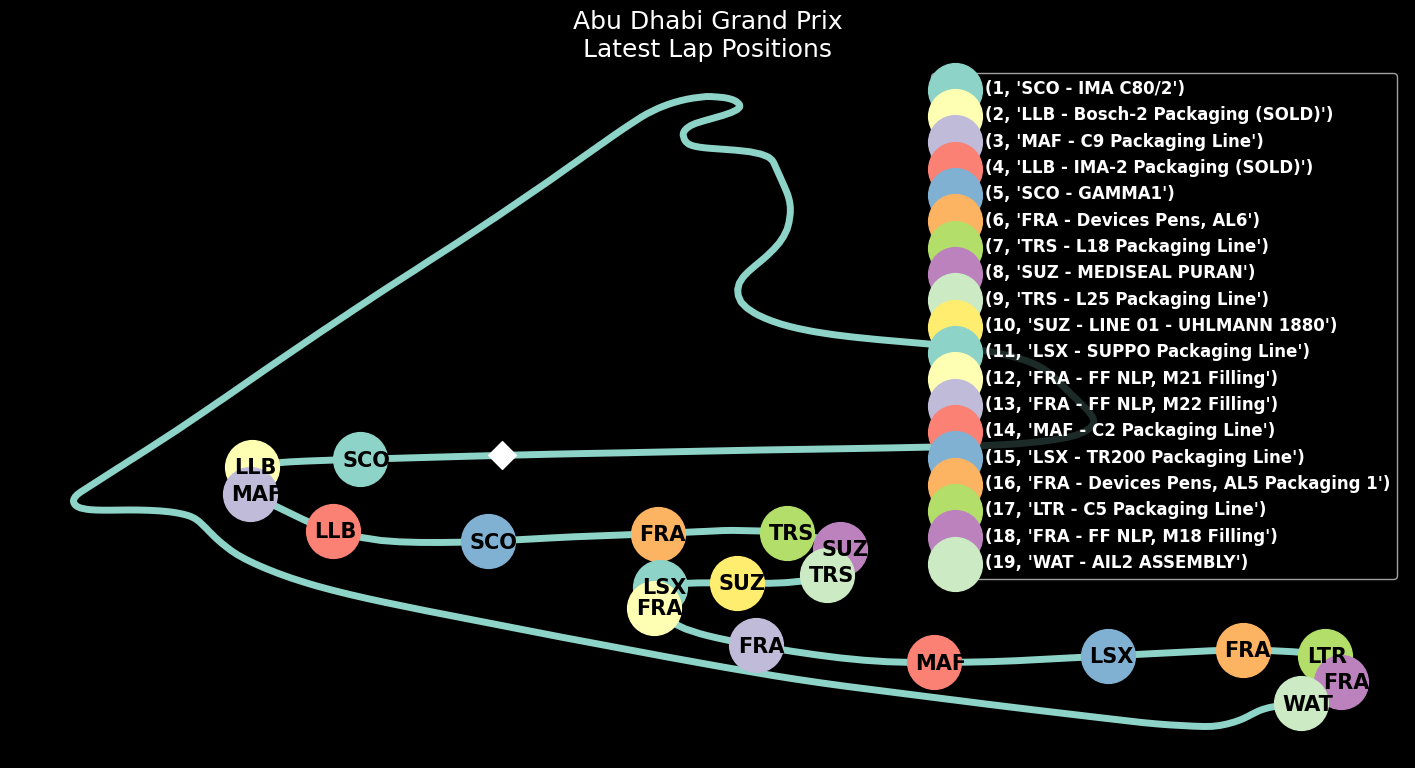

In [16]:
fig, ax = plt.subplots(figsize=(18,9))

plt.plot(tel.X, tel.Y, zorder=1, lw=5)

result_x=[]
result_y=[]

line_names = cars.Line.unique()

t = np.linspace(1,len(line_names), len(cars))

# spaces the cars out around the track
multiplier=-15

count=0

for i, row in cars.iterrows():
    x = tel.X.iloc[int(multiplier*(row[2]))]
    y = tel.Y.iloc[int(multiplier*(row[2]))]
    # result_x.__iadd__([tel.X.iloc[int(multiplier*(row[2]+1))-offset_for_cars]])
    # result_y.__iadd__([tel.Y.iloc[int(multiplier*(row[2]+1))-offset_for_cars]])
    ax.scatter(x, y, s=1500, cmap='turbo_r', zorder=2, label=(count+1, row[0]))
    plt.text(x-120, y-200, row[0][:3], c='black')

    count+=1



font = {'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)

# ax.legend(*scatter.legend_elements())
ax.legend(loc='upper right', fontsize=12)


# show where the start / finish line is
start_x=[]
start_y=[]
start_x = tel.X.iloc[int(1)]
start_y = tel.Y.iloc[int(1)]


# this adds the start/finish marker
ax.scatter(start_x, start_y, marker = 'D', c='white', zorder=2, s=200)
    

plt.title('{} Grand Prix\nLatest Lap Positions'.format(GrandPrix))
plt.axis('off')
plt.show()

In [ ]:
len(line_names)


17